**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip




In [1]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd

In [2]:
url = urlopen("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
zipfile = ZipFile(BytesIO(url.read()))

In [3]:
zipfile.extractall()

In [4]:
! ls ml-latest-small/

README.txt  links.csv   movies.csv  ratings.csv tags.csv


In [5]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

In [6]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movie.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Let's read rating csv file too.

Let print first 3 lines from file

# Q1(1 point) write code to print just 4 line from rating.csv file

In [9]:
with open('./ml-latest-small/ratings.csv', 'r' ) as f:
    for _, line in zip(range(5), f): # replace ???? with right code 
        print(line)
    

userId,movieId,rating,timestamp

1,31,2.5,1260759144

1,1029,3.0,1260759179

1,1061,3.0,1260759182

1,1129,2.0,1260759185



<font color = 'red'> note that in unix/linux system we coiuld have done above thing with</font> <br>

<font color = 'blue'> ! head -n 3  ml-latest-small/ratings.csv  </font>  <br>

Hence seperator is , and last column is time information. Let parse it too

In [10]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv', sep=',')
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
print(ratings.dtypes)
ratings.head()


userId                int64
movieId               int64
rating              float64
timestamp    datetime64[ns]
dtype: object


,userId,movieId,rating,timestamp
0,1,31,2.5,1970-01-01 00:00:01.260759144
1,1,1029,3.0,1970-01-01 00:00:01.260759179
2,1,1061,3.0,1970-01-01 00:00:01.260759182
3,1,1129,2.0,1970-01-01 00:00:01.260759185
4,1,1172,4.0,1970-01-01 00:00:01.260759205


Let's check is anything is null/ NA 

In [11]:
print(ratings.isnull().any())

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool


Let's do some visulization

# Q (2 point) visualize histogram and box plot of rating from ratings dataframe

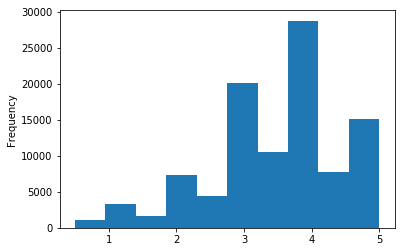

In [12]:
%matplotlib inline
## write code histogram here
ratings['rating'].plot.hist()

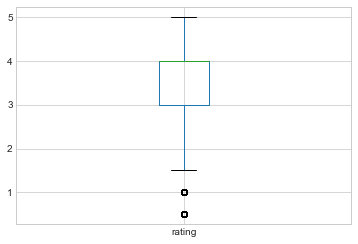

In [76]:
# Write code for box plot here
#ratings['rating'].plot.box()
ratings.boxplot(column=['rating'])
#ratings.groupby['rating'].plot.box()

#df.boxplot(column='total_spend', by='value')


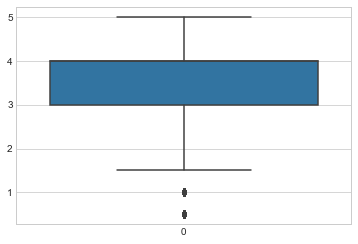

In [15]:
## Using seaborn
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=ratings['rating']);

# Q 3 (1 point) using ratings data frame select only movieId and rating columns and group by movieId 

In [28]:
# For grouped_movies and average_rating
grouped_movie =  ratings[['userId', 'rating']].groupby('userId') # replace ??? by your code
average_rating = grouped_movie.mean()
print(average_rating.head())
print("\nThe shape is")
print(average_rating.shape)
print("\nThe dtype is")
average_rating.dtypes

          rating
userId          
1       2.550000
2       3.486842
3       3.568627
4       4.348039
5       3.910000

The shape is
(671, 1)

The dtype is


rating    float64
dtype: object

In [22]:
# For movie_count
movie_count = grouped_movie.count()
print(movie_count.head())
print("\nThe shape is")
print(movie_count.shape)
print("\nThe dtype is")
movie_count.dtypes

        rating
userId        
1           20
2           76
3           51
4          204
5          100

The shape is
(671, 1)

The dtype is


rating    int64
dtype: object

In [23]:
# For ratings
ratings.head()
print(ratings.count())
print("\nThe shape is")
print(ratings.shape)
print("\nThe dtype is")
ratings.dtypes

userId       100004
movieId      100004
rating       100004
timestamp    100004
dtype: int64

The shape is
(100004, 4)

The dtype is


userId                int64
movieId               int64
rating              float64
timestamp    datetime64[ns]
dtype: object

In [27]:
# for movies
print(movie.head())
print(movie.count())
print("\nThe shape is")
print(movie.shape)
print("\nThe dtype is")
movie.dtypes

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
movieId    9125
title      9125
genres     9125
dtype: int64

The shape is
(9125, 3)

The dtype is


movieId     int64
title      object
genres     object
dtype: object

# Q 4 (2 point)
- merge movie and average_rating data frame on movieId using inner join
- then merge movie_with_avg_rating and  movie_count dataframe on movieId using inner join with suffixed '_avg','_count' on rating column as both dataframe have rating columns

In [42]:
# Merging movie and average_rating data frame
movie_with_avg_rating = pd.merge(movie, average_rating, left_index = True, right_index = True, how = 'inner') # replace ??? by  your code here
movie_with_avg_rating.head()

,movieId,title,genres,rating
1,2,Jumanji (1995),Adventure|Children|Fantasy,2.550000
2,3,Grumpier Old Men (1995),Comedy|Romance,3.486842
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3.568627
4,5,Father of the Bride Part II (1995),Comedy,4.348039
5,6,Heat (1995),Action|Crime|Thriller,3.910000


In [49]:
# Merging movie_with_avg_rating and movie_count dataframe
movie_with_avg_rating_count = pd.merge(movie_with_avg_rating, movie_count, left_index = True, right_index = True, how = 'inner', suffixes = ('_avg', '_count')) # replace ??? by  your code here
movie_with_avg_rating_count.head()

,movieId,title,genres,rating_avg,rating_count
1,2,Jumanji (1995),Adventure|Children|Fantasy,2.550000,20
2,3,Grumpier Old Men (1995),Comedy|Romance,3.486842,76
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3.568627,51
4,5,Father of the Bride Part II (1995),Comedy,4.348039,204
5,6,Heat (1995),Action|Crime|Thriller,3.910000,100


# Q 5 (1 point) select movie with genres Adventure

In [51]:
is_animation = movie_with_avg_rating_count['genres'].str.contains('Adventure') # replace ??? with your code

In [52]:
animation_movies= movie_with_avg_rating_count[is_animation]
animation_movies.head()

,movieId,title,genres,rating_avg,rating_count
1,2,Jumanji (1995),Adventure|Children|Fantasy,2.550000,20
7,8,Tom and Huck (1995),Adventure|Children,3.465909,88
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.755556,45
12,13,Balto (1995),Adventure|Animation|Children,2.754098,61
14,15,Cutthroat Island (1995),Action|Adventure|Romance,2.950000,20


In [53]:
animation_movies = animation_movies.sort_values('rating_avg', ascending=False)
animation_movies.head()

,movieId,title,genres,rating_avg,rating_count
230,258,"Kid in King Arthur's Court, A (1995)",Adventure|Children|Comedy|Fantasy|Romance,4.473404,94
432,485,Last Action Hero (1993),Action|Adventure|Comedy|Fantasy,4.411290,62
577,674,Barbarella (1968),Adventure|Comedy|Sci-Fi,4.345878,279
98,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical,4.330986,71
567,661,James and the Giant Peach (1996),Adventure|Animation|Children|Fantasy|Musical,4.308824,34


# Q 6 (1 point) In above cell, we have found top rated adventure movies. What is wrong with this analysis

It does not show us the top ones as the ascending order is assigned to false